In [42]:
from boson_data_lib import *
import numpy as np
import scipy.linalg as sl
import os
import pandas as pd
import glob

In [43]:
import h5py
import numpy as np

In [44]:
import matplotlib.pyplot as plt

In [45]:
os.chdir("/home/zah/POP23/TESTS/")

In [46]:
#file_name = 'df_POP_RmLME_trn4_gap_tst20_fix-Phi-up_2023-Aug-07_at_15-44.h5.pkl'
no_rm_tst_file_name = 'df_POP_NoRmLME_trn4_gap_tst20_fix-Phi-up_2023-Aug-07_at_16-29.h5.pkl'
#rm_tst_file_name = 'df_POP_RmLME_trn4_gap_tst20_fix-Phi-up_2023-Aug-07_at_15-44.h5.pkl'
#rm_tst_file_name = 'df_POP_Rm1238_trn4_tst20_fix-Phi-up_2023-Aug-12_at_11-24.h5.pkl'
#rm_tst_file_name ='df_POP_Rm1238_trn4_tst20_fix-Phi-up_2023-Aug-12_at_11-38.h5.pkl'
#rm_tst_file_name ='df_POP_Rm1238_trn4_tst20_fix-Phi-up_2023-Aug-12_at_11-52.h5.pkl'
rm_tst_file_name ='df_POP_Rm1238_trn4_tst20_fix-Phi-up_2023-Aug-12_at_12-04.h5.pkl'

no_rm_tst_df = pd.read_pickle(no_rm_tst_file_name)
rm_tst_df = pd.read_pickle(rm_tst_file_name)

In [47]:
rm_tst_df.columns

Index(['Gamma', 'State', 'Time', 'gt', 'F_lme_exact', 'InF_lme_exact',
       'F_sidexact_exact', 'InF_sidexact_exact', 'F_sidlme_lme',
       'InF_sidlme_lme', 'Distance'],
      dtype='object')

In [48]:
import os
os.getcwd()

'/home/zah/POP23/TESTS'

In [49]:
os.chdir("/home/zah/POP23/MODELS/")

#models_file = "POP_RmLME_trn4_gap_fix-Phi-up_2023-Aug-07_at_19-32.h5"
models_file = "POP_NoRmLME_trn4_gap_fix-Phi-up_2023-Aug-07_at_16-29.h5"


coef_gap_ex = []
coef_gap_lme = []
g = []
gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']

with h5py.File(models_file, "r") as f:

    
    #gammas = f.keys()
    
    for gamma in gammas:

        print(gamma)

        coef_gap_ex.append(f["gamma_"+gamma]["coef_gap_ex"][()])
        coef_gap_lme.append(f["gamma_"+gamma]["coef_gap_lme"][()])

print(" done!")


0.079477
0.25133
0.79477
2.5133
7.9477
25.133
79.477
251.33
 done!


In [50]:
def add_log_infidelities(df):
    df['LogInF_lme_exact'] = np.log10(df['InF_lme_exact'])
    df['LogInF_sidlme_lme'] = np.log10(np.abs(df['InF_sidlme_lme']))
    df['LogInF_sidexact_exact'] = np.log10(df['InF_sidexact_exact'])
    df['Gamma'] = df['Gamma'].astype(float)
    
    return df    

In [51]:
no_rm_tst_df = add_log_infidelities(no_rm_tst_df)
rm_tst_df = add_log_infidelities(rm_tst_df)

In [52]:
import seaborn as sns

In [53]:
os.chdir("/home/zah/POP23/")

/tmp/ipykernel_4828/3726890393.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


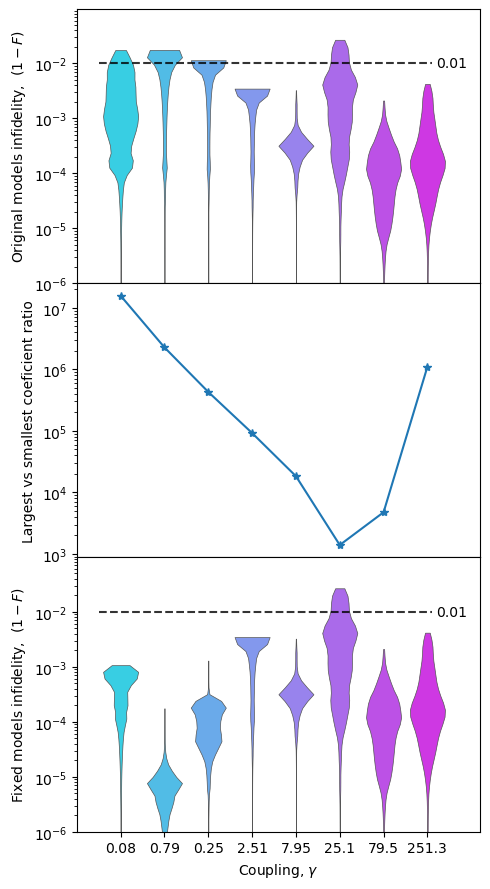

In [54]:
fig, ax = plt.subplots(3, 1, figsize=(5,9), sharex = True)

sns.violinplot(ax=ax[0], data=no_rm_tst_df, x="Gamma", y='LogInF_sidexact_exact', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")
ymin = -6
ymax = -1.01

ytick_range = np.arange(ymin, ymax)                 
ytick_labels = [r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', ] #r'$10^{-1}$',]

ax[0].yaxis.set_ticks(ytick_range, ytick_labels)
ax[0].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[0].set_ylim(ymin, ymax)

ax[0].set_ylabel(r'Original models infidelity,  $(1-F)$')
ax[0].set_xlabel('')

ax[0].hlines(y=np.log10(.01), xmin=-0.5, xmax=7.1, colors='black', linestyles='--', alpha=0.8)
ax[0].text(7.2, np.log10(.01), '0.01', ha='left', va='center')


ax[1].plot(coef_gap_ex, "-*")
ax[1].set_yscale("log")
ax[1].set_ylabel("Largest vs smallest coeficient ratio")


sns.violinplot(ax=ax[2], data=rm_tst_df, x="Gamma", y='LogInF_sidexact_exact', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")

ax[2].yaxis.set_ticks(ytick_range, ytick_labels)
ax[2].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[2].set_ylim(ymin, ymax)
ax[2].set_xlim(-1, 8.2)

ax[2].set_ylabel(r'Fixed models infidelity,  $(1-F)$')
ax[2].set_xlabel(r'Coupling, $\gamma$')


xtick_range = np.arange(0, 8)
xtick_labels = ['0.08', '0.79', '0.25', '2.51', '7.95', '25.1', '79.5', '251.3']

ax[2].xaxis.set_ticks(xtick_range, xtick_labels)

ax[2].hlines(y=np.log10(.01), xmin=-0.5, xmax=7.1, colors='black', linestyles='--', alpha=0.8)
ax[2].text(7.2, np.log10(.01), '0.01', ha='left', va='center')

fig.tight_layout()
fig.subplots_adjust(hspace = .0)

fig.savefig("Infid_SpinBoson_integrated.pdf")

fig.show()